## Predicting Car Accident Severity
### IBM Applied Data Science Capstone Project 

 Table of Content
1. [Introduction](#intro)
2. [Data](#data)
3. [Exploratory Data Analysis](#eda)
4. [Feature Engineering - Data Preparation](#prep)
5. [Model Development](#modeling)
6. [Results](#results)
 

## 1. Introduction

This study aims to develop a model that correctly identifies the severity of the traffic accidents in the city of Seattle. The data that is used for this study is an open source data and taken from Kaggle.com. It includes accident records that covers accidents between the years of 2004 and 2020. The machine learning models that this study implements have slightly different algorithms and they will help us to understand the factors that contribute to the severity of the accidents. Analysis of such factors can potentially help authorities better strategies and plans that might help decrease the number of accidents and the gravity of them. 

## 2. Data

The dataset is taken from Kaggle and it is originally hosted by the City of Seattle. It includes accident records, with all types of collisions, that covers accidents between the years of 2004 and 2020. It is updated weekly. The copy of the data that is used for this study has 38 columns, all of which include different features, and 194673 entries. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Data-Collisions.csv')

## 3. Explatory Data Analysis

In this part I studied the data for a better understanding and further analysis  

In [46]:
df.shape

(194673, 38)

In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [59]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [60]:
#  For consistency, ensure that all column labels of type string.
all(isinstance(column, str) for column in df.columns)

True

In [187]:
df_time = df[['SEVERITYCODE', 'INCDTTM', 'OBJECTID']]
df_time.head()

,SEVERITYCODE,INCDTTM,OBJECTID
0,2,3/27/2013 2:54:00 PM,1
1,1,12/20/2006 6:55:00 PM,2
2,1,11/18/2004 10:20:00 AM,3
3,1,3/29/2013 9:26:00 AM,4
4,2,1/28/2004 8:04:00 AM,5


In [189]:
df_time['INCDTTM'] = pd.to_datetime(df_time['INCDTTM'])
df_time['DATE'] = pd.to_datetime((df_time['INCDTTM']).dt.date)
df_time['YEAR'] = df_time['INCDTTM'].dt.year.astype('int64')
df_time['MONTH'] = df_time['INCDTTM'].dt.month.astype('int64')
df_time['HOUR'] = df_time['INCDTTM'].dt.hour.astype('int64')


In [195]:
df_time.drop(['INCDTTM'],axis=1, inplace=True)

In [196]:
df_time.head()

,SEVERITYCODE,OBJECTID,DATE,YEAR,MONTH,HOUR
0,2,1,2013-03-27,2013,3,14
1,1,2,2006-12-20,2006,12,18
2,1,3,2004-11-18,2004,11,10
3,1,4,2013-03-29,2013,3,9
4,2,5,2004-01-28,2004,1,8


In [190]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [201]:
def catplot_show(column, hue, df):
  g = sns.catplot(column, data=df, aspect=2.0, kind='count',palette="rocket", hue=hue, legend = False)
  g.set_xticklabels(rotation=45, fontsize=12)
  g.set_yticklabels(fontsize=12)
  g.set_xlabels(column, fontsize=12, labelpad = 16)
  g.set_ylabels('Number of Collisions', fontsize=12, labelpad = 16)
  legend = plt.legend(title='Severity', loc=(1,1), fontsize=12)
  legend.get_title().set_fontsize('16')
  plt.show()
  return g

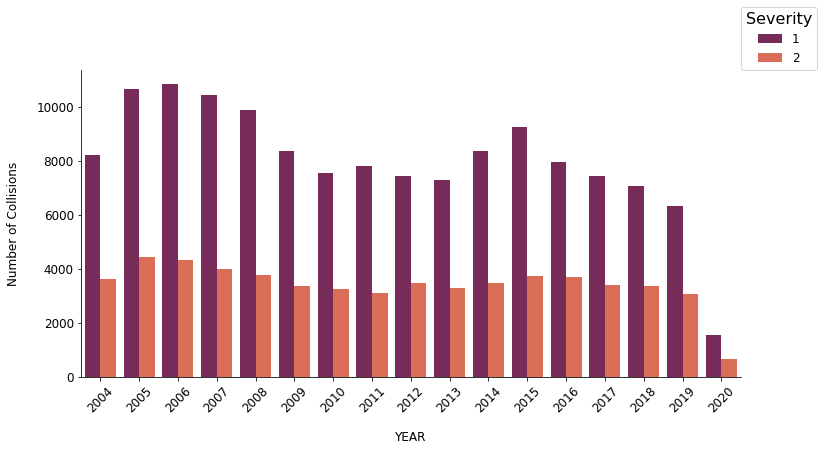

In [202]:
catplot_show('YEAR', 'SEVERITYCODE', df_time);

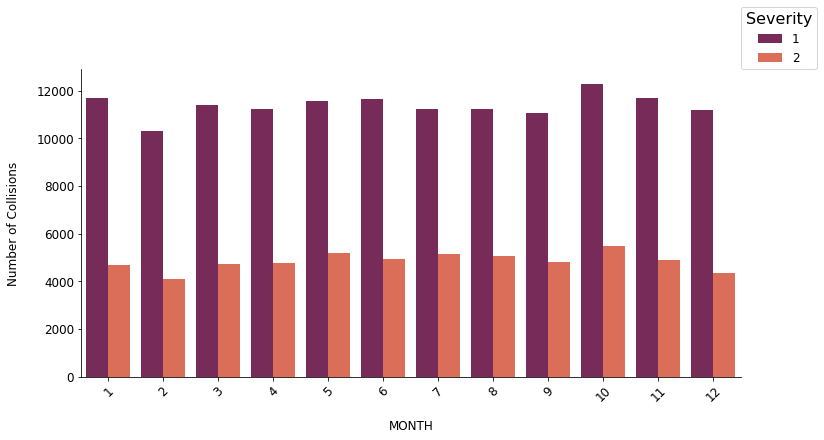

In [203]:
catplot_show('MONTH', 'SEVERITYCODE', df_time);

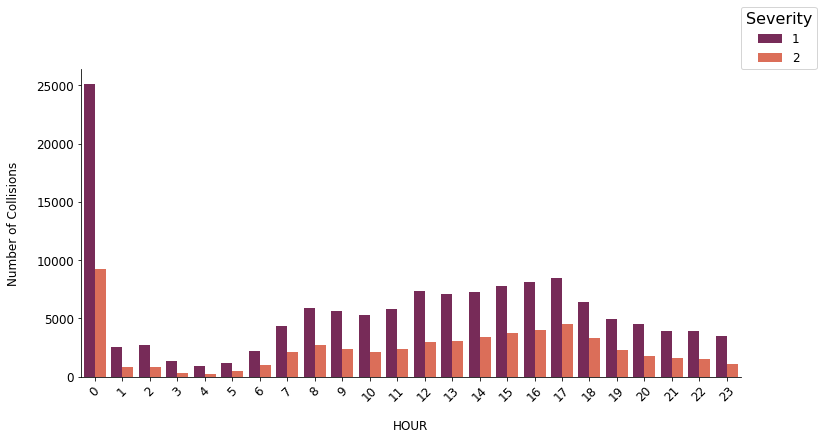

In [204]:
catplot_show('HOUR', 'SEVERITYCODE', df_time);

## 4. Feature Engineering - Data Preparation

In this part I reviewed the data for missing values and outliers and I performed some feature engineering operations such as handling missing values and dropping some variables that seemed unrelevant. 

In [67]:
# making a list of variables that contain missing values:

vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

In [68]:
vars_with_na 

['X',
 'Y',
 'ADDRTYPE',
 'INTKEY',
 'LOCATION',
 'EXCEPTRSNCODE',
 'EXCEPTRSNDESC',
 'COLLISIONTYPE',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SDOTCOLNUM',
 'SPEEDING',
 'ST_COLCODE',
 'ST_COLDESC']

In [69]:
def missing_data(df):
    x = ['column_name','missing_data', 'missing_in_percentage']
    missing_data = pd.DataFrame(columns=x)
    columns = df.columns
    for col in columns:
        icolumn_name = col
        imissing_data = df[col].isnull().sum()
        imissing_in_percentage = (df[col].isnull().sum()/df[col].shape[0])*100
        
        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, imissing_in_percentage]
    print(missing_data) 

In [70]:
missing_data(df)

       column_name missing_data  missing_in_percentage
0     SEVERITYCODE            0               0.000000
1                X         5334               2.739979
2                Y         5334               2.739979
3         OBJECTID            0               0.000000
4           INCKEY            0               0.000000
5        COLDETKEY            0               0.000000
6         REPORTNO            0               0.000000
7           STATUS            0               0.000000
8         ADDRTYPE         1926               0.989351
9           INTKEY       129603              66.574718
10        LOCATION         2677               1.375126
11   EXCEPTRSNCODE       109862              56.434123
12   EXCEPTRSNDESC       189035              97.103861
13  SEVERITYCODE.1            0               0.000000
14    SEVERITYDESC            0               0.000000
15   COLLISIONTYPE         4904               2.519096
16     PERSONCOUNT            0               0.000000
17        

In terms of missing values, several variables have relatively high proportion of missing values and should be taken care of. But before doing that I will drop some features that are not relevant for our inquiry in predicting the severity of accidents. Selecting most relevant features is important for both developing an effective model and as well as for practical deployment. 

In [88]:
df_model = df[['SEVERITYCODE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'COLLISIONTYPE', 'UNDERINFL','SPEEDING']].copy()

In [209]:
df_model.rename(columns={'UNDERINFL':'UNDERINFLUENCE'},inplace=True)

In [210]:
df_model.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,COLLISIONTYPE,UNDERINFLUENCE,SPEEDING
0,2,Overcast,Wet,Daylight,Angles,N,N
1,1,Raining,Wet,Dark - Street Lights On,Sideswipe,N,N
2,1,Overcast,Dry,Daylight,Parked Car,N,N
3,1,Clear,Dry,Daylight,Other,N,N
4,2,Raining,Wet,Daylight,Angles,N,N


I have now a set of 7 features that I consider most relevant for predicting car accident severity

In [211]:
df_model.isnull().sum()

SEVERITYCODE      0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
COLLISIONTYPE     0
UNDERINFLUENCE    0
SPEEDING          0
dtype: int64

In [212]:
df_model['SPEEDING'].dtype

dtype('O')

In [213]:
df_model['SPEEDING'].value_counts()

N    185340
Y      9333
Name: SPEEDING, dtype: int64

In [215]:
df_model.fillna({'SPEEDING':'N'},inplace=True)
df_model['UNDERINFLUENCE'].replace({'0':'N', np.nan:'N', '1':'Y'}, inplace=True)
df_model.fillna({'COLLISIONTYPE':'Other', 'WEATHER':'Other', 'ROADCOND':'Unknown', 'LIGHTCOND':'Unknown'},inplace=True)

In [216]:
df_model.isnull().sum()

SEVERITYCODE      0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
COLLISIONTYPE     0
UNDERINFLUENCE    0
SPEEDING          0
dtype: int64

Text(0.5, 1.0, 'Speed Feature Values')

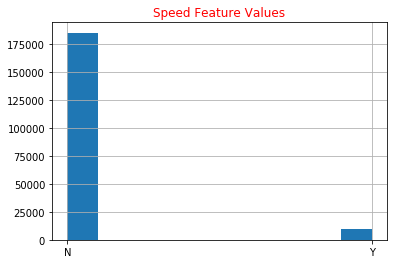

In [226]:
df_model.SPEEDING.describe(), df_model.SPEEDING.hist()
plt.title('Speed Feature Values', color='r')

In [217]:
def catplot_show(column, hue, df):
  p = sns.catplot(orient = 'h', y = column, data=df, aspect=2.0, kind='count', palette="pastel", hue=hue, legend = False)
  p.set_xticklabels(rotation=45, fontsize=12)
  p.set_yticklabels(fontsize=12)
  p.set_ylabels(column, fontsize=12, labelpad = 16)
  p.set_xlabels('Number of Collisions', fontsize=12, labelpad = 16)
  legend = plt.legend(title='SEVERITY', loc=(1,1), fontsize=12)
  legend.get_title().set_fontsize('16')
  plt.show()
  return p

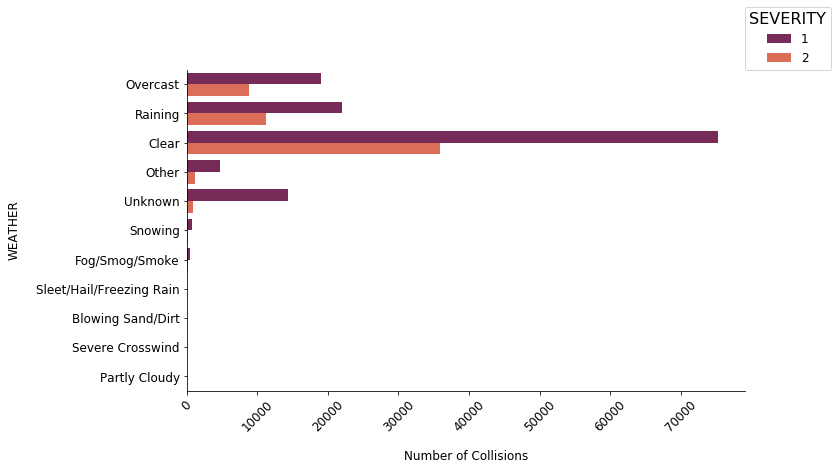

In [218]:
catplot_show('WEATHER', 'SEVERITYCODE', df_model);

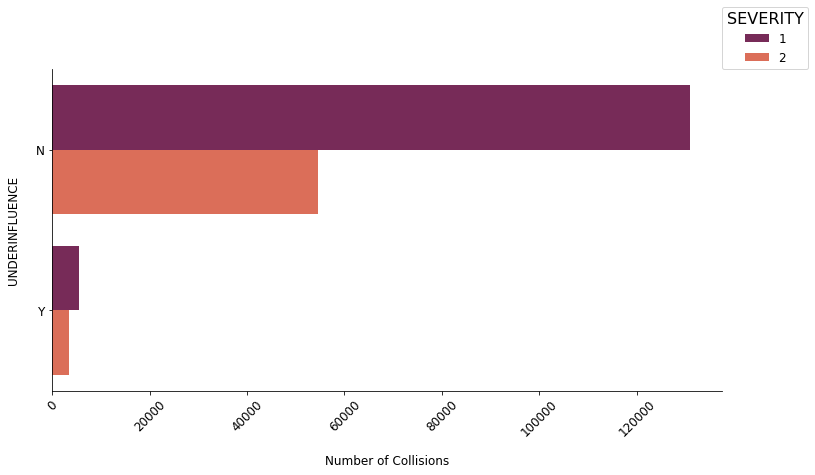

In [224]:
catplot_show('UNDERINFLUENCE', 'SEVERITYCODE', df_model);

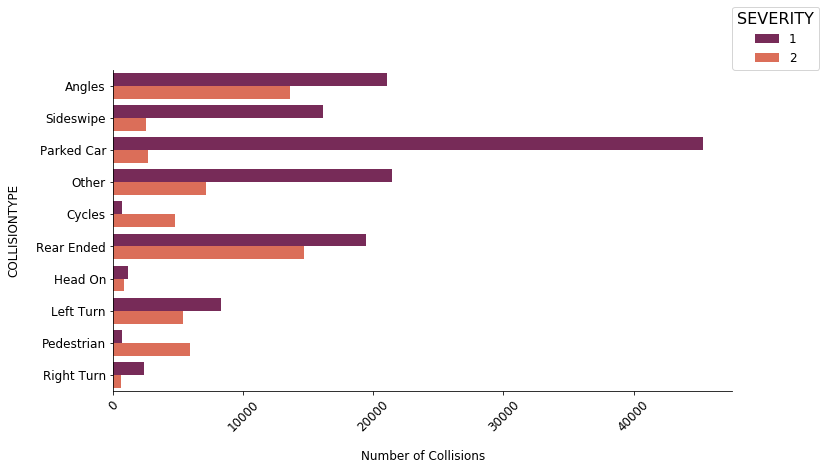

In [219]:
catplot_show('COLLISIONTYPE', 'SEVERITYCODE', df_model);

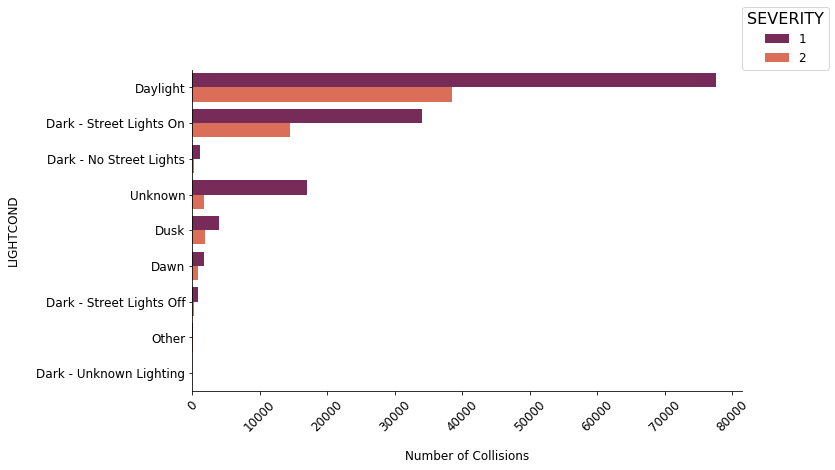

In [222]:
catplot_show('LIGHTCOND', 'SEVERITYCODE', df_model);

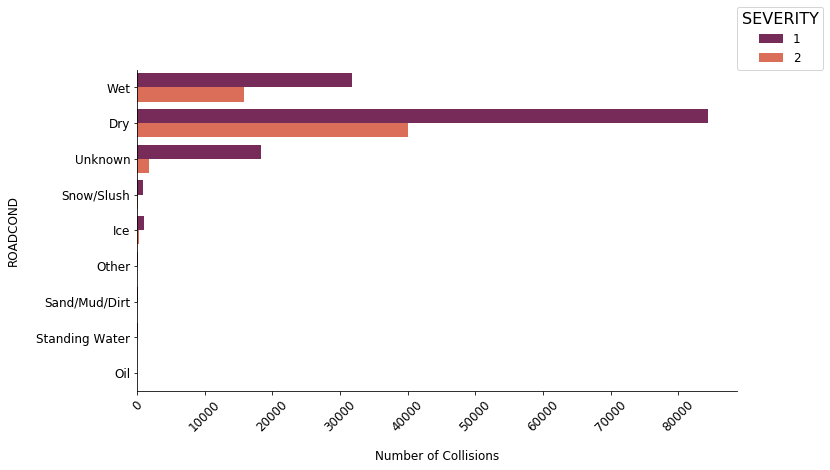

In [223]:

catplot_show('ROADCOND', 'SEVERITYCODE', df_model);

Label Encoding

In [229]:
binary_cols = ['UNDERINFLUENCE', 'SPEEDING']
for value in binary_cols: df_model[value].replace({'Y':1, 'N': 0}, inplace=True)

In [230]:
cat_cols = ['COLLISIONTYPE','WEATHER','ROADCOND','LIGHTCOND']
df_model = pd.get_dummies(data=df_model, columns=cat_cols)
df_model.head()

,SEVERITYCODE,UNDERINFLUENCE,SPEEDING,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Other,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,2,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [231]:
df_model.isnull().sum()

SEVERITYCODE                          0
UNDERINFLUENCE                        0
SPEEDING                              0
COLLISIONTYPE_Angles                  0
COLLISIONTYPE_Cycles                  0
COLLISIONTYPE_Head On                 0
COLLISIONTYPE_Left Turn               0
COLLISIONTYPE_Other                   0
COLLISIONTYPE_Parked Car              0
COLLISIONTYPE_Pedestrian              0
COLLISIONTYPE_Rear Ended              0
COLLISIONTYPE_Right Turn              0
COLLISIONTYPE_Sideswipe               0
WEATHER_Blowing Sand/Dirt             0
WEATHER_Clear                         0
WEATHER_Fog/Smog/Smoke                0
WEATHER_Other                         0
WEATHER_Overcast                      0
WEATHER_Partly Cloudy                 0
WEATHER_Raining                       0
WEATHER_Severe Crosswind              0
WEATHER_Sleet/Hail/Freezing Rain      0
WEATHER_Snowing                       0
WEATHER_Unknown                       0
ROADCOND_Dry                          0


## 5. Model Development

In [237]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#evaluation metrics
import time
from sklearn.metrics import log_loss, jaccard_similarity_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [234]:
X = df_model.drop('SEVERITYCODE', axis=1)
y = df_model['SEVERITYCODE']
X.shape, y.shape

((194673, 41), (194673,))

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 117)
X_train.shape, X_test.shape

((155738, 41), (38935, 41))

Logistic Regression

In [255]:
t0=time.time()
log_reg=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)
y_pred_log_reg=log_reg.predict(X_test)
jaccard_lr = jaccard_similarity_score(y_test,y_pred_log_reg)
log_reg_f1_score = f1_score(y_test,y_pred_log_reg, average='weighted')
log_reg_accuracy_score = metrics.accuracy_score(y_test,y_pred_log_reg)
prec_log = precision_score(y_test, y_pred_log_reg)
rec_log = recall_score(y_test, y_pred_log_reg)
print('Time taken :' , time.time()-t0)
print('f1 Score: ', log_reg_f1_score)
print('Accuracy Score: ', log_reg_accuracy_score)
print('Jaccard :',jaccard_lr)

Time taken : 0.6218419075012207
f1 Score:  0.6968481371426071
Accuracy Score:  0.749993579041993
Jaccard : 0.749993579041993


Decision Tree

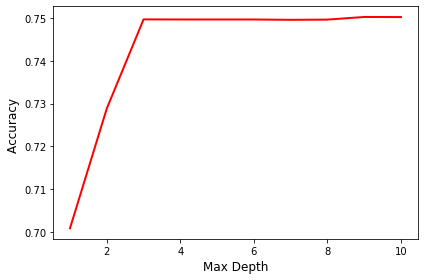

In [244]:
depth = 11
accuracy_score = []
for d in range(1,depth):
    dtc = DecisionTreeClassifier(criterion="entropy", max_depth = d)
    dtc.fit(X_train,y_train)
    y_pred = dtc.predict(X_test)
    accuracy_score.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(range(1,depth),accuracy_score,'r', lw = 2)
plt.ylabel('Accuracy ',fontsize =12)
plt.xlabel('Max Depth',fontsize =12)
plt.tight_layout()
plt.show()

In [246]:
dtc_tuned = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
dtc_tuned.fit(X_train,y_train)
y_pred_tuned = dtc_tuned.predict(X_test)
dtc_tuned_f1 = f1_score(y_test, y_pred_tuned, average='weighted')
dtc_tuned_accuracy = metrics.accuracy_score(y_test, y_pred_tuned)
print('Time taken :' , time.time()-t0)
print('f1 Score: ', dtc_tuned_f1)
print('Accuracy Score: ', dtc_tuned_accuracy)

Time taken : 147.4089379310608
f1 Score:  0.6859778068715808
Accuracy Score:  0.7496340053936047


In [ ]:
Random Forests

In [250]:
t0=time.time()
rf=RandomForestClassifier(max_depth = 17)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
rf_f1_score = f1_score(y_test,y_pred_rf, average='weighted')
rf_accuracy_score = metrics.accuracy_score(y_test,y_pred_rf)
print('Time taken :' , time.time()-t0)
print('f1 Score: ', rf_f1_score)
print('Accuracy Score: ', rf_accuracy_score)

Time taken : 17.491930961608887
f1 Score:  0.6926598402337762
Accuracy Score:  0.7509695646590472


In [ ]:
K-Nearest Neighbors (KNN)

In [251]:
t0=time.time()
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
knn_f1_score = f1_score(y_test,y_pred_knn, average='weighted')
knn_accuracy_score = metrics.accuracy_score(y_test,y_pred_knn)
print('Time taken :' , time.time()-t0)
print('f1 Score: ', knn_f1_score)
print('Accuracy Score: ', knn_accuracy_score)

Time taken : 416.6370050907135
f1 Score:  0.6978095522514085
Accuracy Score:  0.7409785540002568


Gradient Boosting

In [253]:
t0=time.time()
gbm=GradientBoostingClassifier(max_depth = 4)
gbm.fit(X_train,y_train)
y_pred_gbm=gbm.predict(X_test)
gbm_f1_score = f1_score(y_test,y_pred_gbm, average='weighted')
gbm_accuracy_score = metrics.accuracy_score(y_test,y_pred_gbm)
print('Time taken :' , time.time()-t0)
print('f1 Score: ', gbm_f1_score)
print('Accuracy Score: ', gbm_accuracy_score)

Time taken : 28.608286142349243
f1 Score:  0.6918265159737057
Accuracy Score:  0.7509952484910749


SVM (Support Vector Machine) 

In [275]:
size = [1000,5000,10000,12000,15000,20000,30000,40000,50000,75000]
acc = []
t = []
for s in size:
    t0=time.time()
    svm = SVC().fit(X_train[:s],y_train[:s])
    t.append(time.time()-t0)
    y_pred_svm=svm.predict(X_test[:s])
    acc.append(jaccard_similarity_score(y_test[:s],y_pred_svm))

In [276]:
performance = pd.DataFrame({'acc':acc, 'time':t}, index=size)
performance

,acc,time
1000,0.719000,0.164019
5000,0.741600,2.191340
10000,0.734100,9.694078
12000,0.736917,9.999889
15000,0.742467,11.587758
20000,0.746150,21.152972
30000,0.748500,54.141236
40000,0.750148,99.491751
50000,0.750738,131.733418
75000,0.750661,593.530088


Text(0.5, 1.0, 'Time(s)')

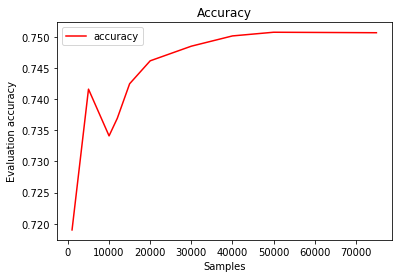

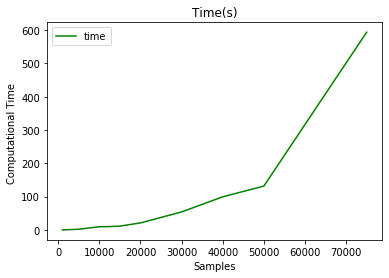

In [277]:
performance.plot(y='acc', color='r', label='accuracy')
plt.xlabel('Samples')
plt.ylabel('Evaluation accuracy')
plt.title('Accuracy')
performance.plot(y='time', color='green', label='time')
plt.xlabel('Samples')
plt.ylabel('Computational Time ')
plt.title('Time(s)')

In [278]:
#Evaluation

s=100000
t0=time.time()
svm = SVC().fit(X_train[:s],y_train[:s])
t_svm = time.time()-t0
y_pred_svm=svm.predict(X_test[:s])
jaccard_svm = jaccard_similarity_score(y_test[:s],y_pred_svm)
c_svm = classification_report(y_test[:s],y_pred_svm)
prec_svm = precision_score(y_test[:s], y_pred_svm)
rec_svm = recall_score(y_test[:s], y_pred_svm)

svm_f1_score = f1_score(y_test,y_pred_svm, average='weighted')
svm_accuracy_score = metrics.accuracy_score(y_test,y_pred_svm)
print('Time taken :' , time.time()-t0)
print('f1 Score: ', rf_f1_score)
print('Accuracy Score: ', rf_accuracy_score)

Time taken : 1393.654053926468
f1 Score:  0.6926598402337762
Accuracy Score:  0.7509695646590472


## 6. Results

In [ ]:
Model Comparison

In [279]:
scores={'Model':['Decision Tree','KNN','Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM'],
    'F1 Score': [dtc_tuned_f1,knn_f1_score,log_reg_f1_score, gbm_f1_score, rf_f1_score, svm_f1_score],
    'Accuracy': [dtc_tuned_accuracy,knn_accuracy_score,log_reg_accuracy_score,gbm_accuracy_score,rf_accuracy_score, svm_accuracy_score]}

scores=pd.DataFrame(scores)
scores.set_index('Model')


,F1 Score,Accuracy
Model,,
Decision Tree,0.685978,0.749634
KNN,0.697810,0.740979
Logistic Regression,0.696848,0.749994
Gradient Boosting,0.691827,0.750995
Random Forest,0.692660,0.750970
SVM,0.691684,0.751098


Selected features from the dataset have been used with 6 different machine learning models. The final comparison of models shows that SVM has the highest accuracy score by a very small margin. However, given its high F1 and accuracy score and its relatively easier implementation, I personally prefer using Random Forest model.  